In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn import preprocessing

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
df=pd.read_csv('loan_train.csv')

In [3]:
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])

In [4]:
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


In [5]:
df['dayofweek']=df['effective_date'].dt.dayofweek
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4
...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,6
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0


In [6]:
df['weekend']=df['dayofweek'].apply(lambda x:1 if(x>3) else 0)
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6,1
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,6,1
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0,0
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0,0


In [7]:
label_encoder=preprocessing.LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,1,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,0,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,1,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,1,6,1
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,1,6,1
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,1,0,0
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,1,0,0


In [8]:
feature=df[['Principal','terms','age','Gender','weekend']]
feature=pd.concat([feature,pd.get_dummies(df['education'])],axis=1)
feature.drop(['Master or Above'],axis=1,inplace=True)
feature

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,1,0,0,1,0
1,1000,30,33,0,0,1,0,0
2,1000,15,27,1,0,0,0,1
3,1000,30,28,0,1,0,0,1
4,1000,30,29,1,1,0,0,1
...,...,...,...,...,...,...,...,...
341,800,15,32,1,1,0,1,0
342,1000,30,25,1,1,0,1,0
343,800,15,39,1,0,0,0,1
344,1000,30,28,1,0,0,0,1


In [9]:
X=feature
y=df['loan_status']
y

0         PAIDOFF
1         PAIDOFF
2         PAIDOFF
3         PAIDOFF
4         PAIDOFF
          ...    
341    COLLECTION
342    COLLECTION
343    COLLECTION
344    COLLECTION
345    COLLECTION
Name: loan_status, Length: 346, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [11]:
print(X_train.shape)
print(y_train.shape)

(276, 8)
(276,)


In [12]:
X_train=preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_train

array([[ 0.55125005, -0.94831949, -1.15316558, ..., -0.38729833,
         1.15714435, -0.87705802],
       [-1.32708345, -0.94831949,  2.17605723, ..., -0.38729833,
        -0.86419641,  1.14017543],
       [ 0.55125005,  0.93287011,  0.0120624 , ..., -0.38729833,
         1.15714435, -0.87705802],
       ...,
       [ 0.55125005,  0.93287011, -0.98670444, ..., -0.38729833,
        -0.86419641,  1.14017543],
       [ 0.55125005,  0.93287011, -0.15439874, ..., -0.38729833,
        -0.86419641,  1.14017543],
       [-1.32708345, -0.94831949,  2.00959608, ..., -0.38729833,
         1.15714435, -0.87705802]])

In [13]:
X_test=preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [14]:
y_test=label_encoder.fit_transform(y_test)
y_test

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1])

In [15]:
y_train=label_encoder.fit_transform(y_train)
y_train

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

accuracy score for  1   0.6060606060606061
accuracy score for  2   0.5666666666666667
accuracy score for  3   0.6461538461538462
accuracy score for  4   0.639344262295082
accuracy score for  5   0.6515151515151515
accuracy score for  6   0.6666666666666666
accuracy score for  7   0.65625
accuracy score for  8   0.6507936507936508
accuracy score for  9   0.6307692307692307


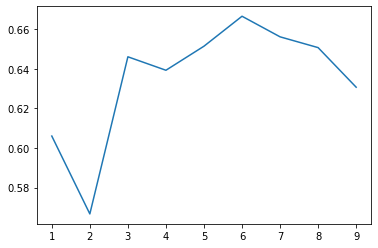

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
k_range=range(1,10)
accuracy_score1=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    #print(jaccard_score(y_test,y_pred))
    print("accuracy score for ",k," ",jaccard_score(y_test,y_pred))
    accuracy_score1.append(jaccard_score(y_test,y_pred))
plt.plot(k_range,accuracy_score1)


In [17]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
func_list=['linear','poly','rbf','sigmoid']
accuracy_score1=[]
for func in func_list:
    SVM=svm.SVC(kernel=func)
    SVM.fit(X_train,y_train)
    y_pred=SVM.predict(X_test)
    print("f1 score for ",func," ",f1_score(y_test,y_pred))
    print("accuracy score ",func," ",accuracy_score(y_test,y_pred))
    accuracy_score1.append(f1_score(y_test,y_pred))


f1 score for  linear   0.8135593220338984
accuracy score  linear   0.6857142857142857
f1 score for  poly   0.8034188034188035
accuracy score  poly   0.6714285714285714
f1 score for  rbf   0.7592592592592592
accuracy score  rbf   0.6285714285714286
f1 score for  sigmoid   0.8034188034188035
accuracy score  sigmoid   0.6714285714285714


TypeError: unsupported operand type(s) for +: 'int' and 'function'

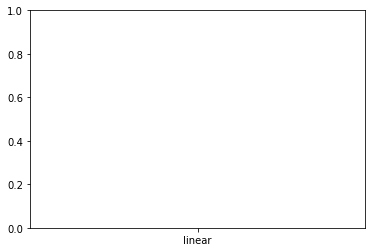

In [18]:
plt.bar(func_list, accuracy_score, align='center', alpha=1)

In [19]:
SVM = svm.SVC(kernel='linear')

SVM.fit(X_train, y_train)
SVM

SVC(kernel='linear')

In [20]:
##implement LR;
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred=LR.predict(X_test)

In [22]:
jaccard_score(y_test,y_pred)

0.6376811594202898